In [61]:
!pip install wordcloud

In [2]:
!pip install nltk

In [1]:
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import sys
from time import time

import pandas as pd
import numpy as np

In [19]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
categories = ['alt.atheism','talk.religion.misc','comp.graphics','sci.space', ]

### https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [34]:
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, shuffle=False, remove=('headers','footers', 'quotes'))

In [37]:
df = pd.DataFrame({
        'text': newsgroups_data.data,
         'target': newsgroups_data.target,
          'text_lemma': newsgroups_data.data
})

In [38]:
df.head()

,text,target,text_lemma
0,\n\nI think that domestication will change beh...,0,\n\nI think that domestication will change beh...
1,\n\nI think I can. Largely as a result of effo...,2,\n\nI think I can. Largely as a result of effo...
2,"In regards to fractal commpression, I have see...",1,"In regards to fractal commpression, I have see..."
3,\n \n(Deletion)\n \n \nYou have given that ex...,0,\n \n(Deletion)\n \n \nYou have given that ex...
4,Background: The Orion spacedrive was a theoret...,2,Background: The Orion spacedrive was a theoret...


In [26]:
category_names = newsgroups_data.target_names
category_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [39]:
df['category'] = df['target'].apply(lambda x: category_names[x])

In [28]:
df.head()

,text,target,category
0,\n\nI think that domestication will change beh...,0,alt.atheism
1,\n\nI think I can. Largely as a result of effo...,2,sci.space
2,"In regards to fractal commpression, I have see...",1,comp.graphics
3,\n \n(Deletion)\n \n \nYou have given that ex...,0,alt.atheism
4,Background: The Orion spacedrive was a theoret...,2,sci.space


In [16]:
import nltk


In [18]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
lemmatizer = WordNetLemmatizer()
for i in range(len(df.text)):
    word_list= word_tokenize(df.text[i])
    lemmatized_doc = ""
    for word in word_list:
        lemmatized_doc = lemmatized_doc + " " + lemmatizer.lemmatize(word)
    df.text_lemma[i] = lemmatized_doc

/tmp/ipykernel_14951/3188710990.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text_lemma[i] = lemmatized_doc
/tmp/ipykernel_14951/3188710990.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text_lemma[i] = lemmatized_doc
/tmp/ipykernel_14951/3188710990.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.text_lemma[i] = lemmatized_doc
/tmp/ipykernel_14951/3188710990.py:7: SettingWithCopyWarning: 
A value is trying to b

In [41]:
df.head()

,text,target,text_lemma,category
0,\n\nI think that domestication will change beh...,0,I think that domestication will change behavi...,alt.atheism
1,\n\nI think I can. Largely as a result of effo...,2,I think I can . Largely a a result of effort ...,sci.space
2,"In regards to fractal commpression, I have see...",1,"In regard to fractal commpression , I have se...",comp.graphics
3,\n \n(Deletion)\n \n \nYou have given that ex...,0,( Deletion ) You have given that example . It...,alt.atheism
4,Background: The Orion spacedrive was a theoret...,2,Background : The Orion spacedrive wa a theore...,sci.space


In [45]:
from nltk.stem import PorterStemmer


In [48]:
stemmer = PorterStemmer()

def stem_text(text):
    words = nltk.word_tokenize(text)
    return " ".join([stemmer.stem(word) for word in words])

In [49]:
df['stemmed_text'] = df['text'].apply(stem_text)

In [50]:
df.head()

,text,target,text_lemma,category,stemmed_text
0,\n\nI think that domestication will change beh...,0,I think that domestication will change behavi...,alt.atheism,i think that domest will chang behavior to a l...
1,\n\nI think I can. Largely as a result of effo...,2,I think I can . Largely a a result of effort ...,sci.space,i think i can . larg as a result of effort by ...
2,"In regards to fractal commpression, I have see...",1,"In regard to fractal commpression , I have se...",comp.graphics,"in regard to fractal commpress , i have seen 2..."
3,\n \n(Deletion)\n \n \nYou have given that ex...,0,( Deletion ) You have given that example . It...,alt.atheism,( delet ) you have given that exampl . it is n...
4,Background: The Orion spacedrive was a theoret...,2,Background : The Orion spacedrive wa a theore...,sci.space,background : the orion spacedr wa a theoret co...


In [71]:
n_clusters = 4

In [74]:
vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english',min_df=2,max_df=0.85)
vectorizer2 = TfidfVectorizer(strip_accents='unicode', stop_words='english',min_df=2,max_df=0.85)

In [75]:
X = vectorizer.fit_transform(df.text_lemma)

In [76]:
km = KMeans(n_clusters=n_clusters)

In [77]:
t0 = time()
km.fit(X)
print("Feito em  %0.3f" % (time() - t0))

Feito em  0.309


In [78]:
X_stem = vectorizer2.fit_transform(df.stemmed_text)

In [79]:
km2 = KMeans(n_clusters=n_clusters)

In [80]:
t0 = time()
km2.fit(X_stem)
print("Feito em  %0.3f" % (time() - t0))

Feito em  0.096


In [81]:
centroids = km.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names_out()
for i in range(n_clusters):
    print("Cluster %d" % i , end ='')
    for ind in centroids[i,:10]:
        print(' %s ' % terms[ind], end='')
    print()


Cluster 0 space  wa  nasa  launch  year  shuttle  orbit  like  moon  mission 
Cluster 1 wa  just  like  think  know  ha  time  did  point  post 
Cluster 2 file  image  format  thanks  program  graphic  know  gif  color  bit 
Cluster 3 god  jesus  wa  people  doe  say  religion  belief  believe  bible 


In [82]:
centroids = km2.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names_out()
for i in range(n_clusters):
    print("Cluster %d" % i , end ='')
    for ind in centroids[i,:10]:
        print(' %s ' % terms[ind], end='')
    print()


Cluster 0 noted  elf  aware  237  lost  distribute  commercialization  peanut  makes  amen 
Cluster 1 preston  reprinting  alice  rebuked  gl  correspodence  pretending  haines  egs  gender 
Cluster 2 graphlib  egs  fuller  leo  lazerus  frantic  bulky  bulletins  dutt  escapee 
Cluster 3 induced  chapter  compulsion  opposing  atlas  accomplish  graphlib  precicely  expo  portability 


In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [88]:
def frequecies_dict(cluster_index, kmeans):
    if cluster_index > n_clusters -1:
        return
    term_frequecies = kmeans.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequecies[i] for i in sorted_terms}
    return frequencies

In [90]:
def make_image(frequencies):
    wc = WordCloud(background_color='white', max_words=50)
    wc.generate_from_frequencies(frequencies)
    plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    plt.show()

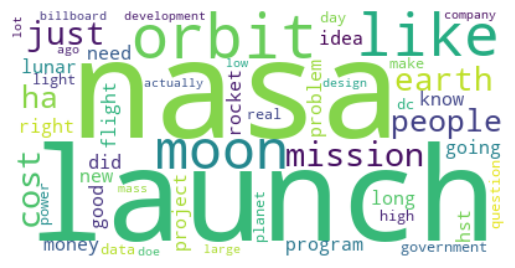

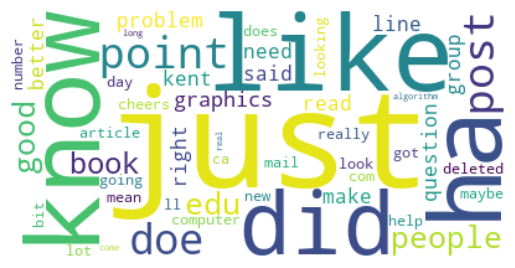

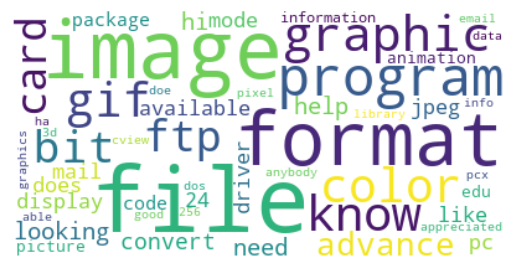

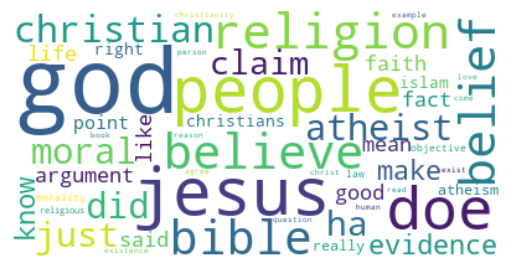

In [91]:
for i in range(n_clusters):
    freq = frequecies_dict(i,km)
    make_image(freq)
    print()

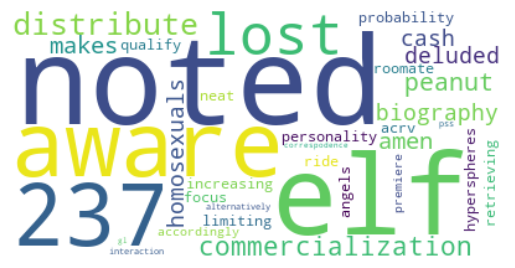

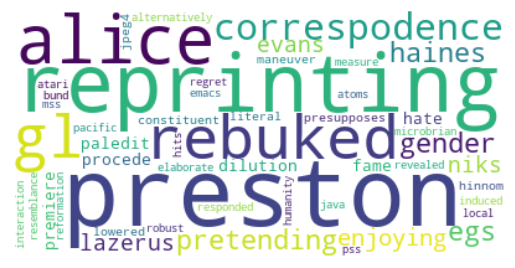

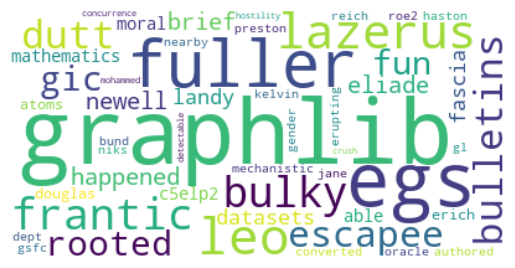

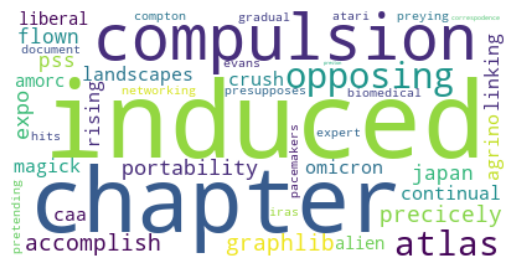

In [101]:
for i in range(n_clusters):
    freq = frequecies_dict(i,km2)
    make_image(freq)
    print()

In [94]:
labels = df.target

In [99]:
print("Homogeniedade: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completude: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeniedade: 0.308
Completude: 0.353
V-measure: 0.329
Adjusted Rand-Index: 0.153
Silhouette Coefficient: 0.008


In [100]:
print("Homogeniedade: %0.3f" % metrics.homogeneity_score(labels, km2.labels_))
print("Completude: %0.3f" % metrics.completeness_score(labels, km2.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km2.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km2.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_stem, km2.labels_, sample_size=1000))

Homogeniedade: 0.002
Completude: 0.199
V-measure: 0.005
Adjusted Rand-Index: 0.001
Silhouette Coefficient: 0.008


## Utilizando LSA - Latent Semantic Analysis
## e SVD TrucantedSVC(Singular Value Decomposition)

In [102]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [105]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.5,max_features=1000,stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroups.data)

In [111]:
vocabulary = tfidf_vectorizer.get_feature_names_out()



In [114]:
from sklearn.decomposition import TruncatedSVD

In [116]:
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

In [118]:
k = 20

In [120]:
kmeans = KMeans(n_clusters=k, random_state=42)

In [121]:
kmeans.fit(lsa_matrix)

KMeans(n_clusters=20, random_state=42)

In [123]:
labels = kmeans.labels_
clusters_centers = kmeans.cluster_centers_

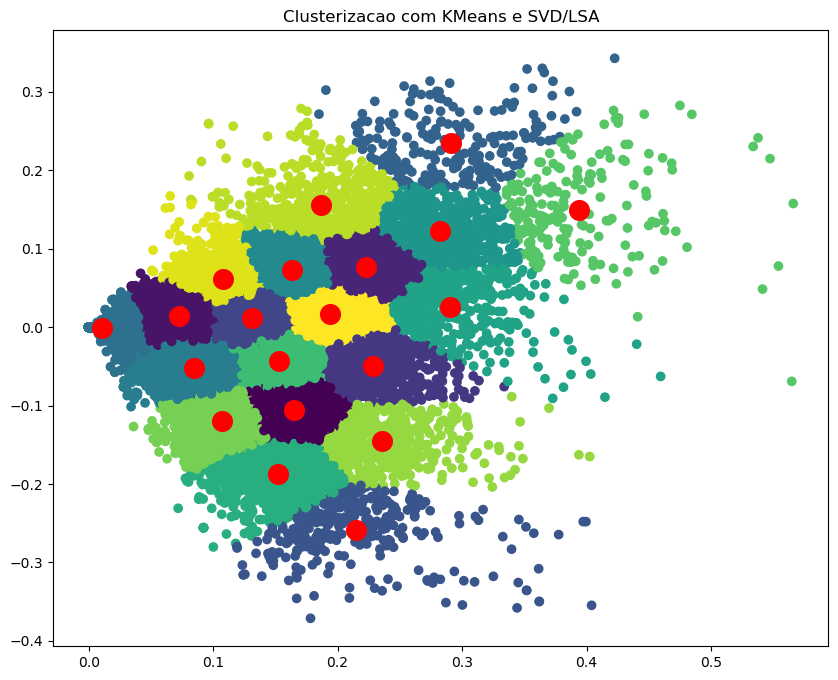

In [126]:
plt.figure(figsize=(10,8))
plt.scatter(lsa_matrix[:,0],lsa_matrix[:,1], c=labels, cmap='viridis')
plt.scatter(clusters_centers[:,0], clusters_centers[:,1],s=200, c='red')
plt.title("Clusterizacao com KMeans e SVD/LSA")
plt.show()

In [127]:
print("Homogeniedade: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completude: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(lsa_matrix, kmeans.labels_, sample_size=1000))

Homogeniedade: 1.000
Completude: 1.000
V-measure: 1.000
Adjusted Rand-Index: 1.000
Silhouette Coefficient: 0.354


In [129]:
centroids = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names_out()
for i in range(20):
    print("Cluster %d" % i , end ='')
    for ind in centroids[i,:10]:
        print(' %s ' % terms[ind], end='')
    print()


Cluster 0 00  000 
Cluster 1 00  000 
Cluster 2 00  000 
Cluster 3 00  000 
Cluster 4 00  000 
Cluster 5 00  000 
Cluster 6 00  000 
Cluster 7 00  000 
Cluster 8 00  000 
Cluster 9 00  000 
Cluster 10 00  000 
Cluster 11 00  000 
Cluster 12 00  000 
Cluster 13 00  000 
Cluster 14 00  000 
Cluster 15 00  000 
Cluster 16 00  000 
Cluster 17 00  000 
Cluster 18 00  000 
Cluster 19 00  000 
